In [9]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error 

In [5]:
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0],index_col=0)

In [6]:
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


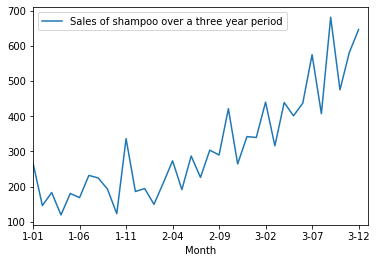

In [7]:
series.plot()

In [10]:
sm.stats.durbin_watson(series)

array([nan])

In [11]:
series.isna().sum()

Sales of shampoo over a three year period    1
dtype: int64

In [18]:
series = series.iloc[:-1,:]

In [19]:
sm.stats.durbin_watson(series)


array([0.09548538])

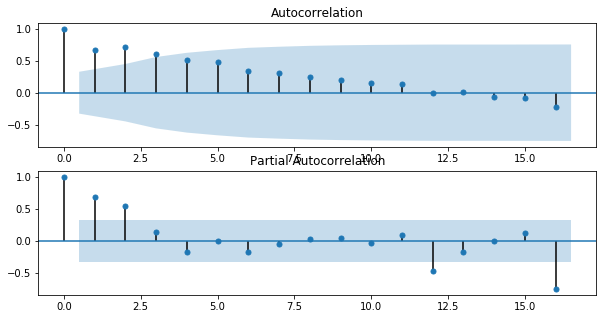

In [25]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series,ax =ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series,ax =ax2)

In [37]:
x = series.iloc[:,:-1]
y= series.iloc[:,-1]

In [41]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(series,order=(3,1,4)) #p,d,q(pacf,d,acf)
model = arima.fit()


/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/local/SIRIONLABS/nikhil.bansal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [42]:
model.forecast(steps=20)[0]

array([610.34872138, 644.40460657, 581.78621709, 690.75909109,
       613.62238385, 671.19504654, 687.17701774, 644.80826333,
       732.72442007, 668.78015938, 724.56661115, 731.14936595,
       705.2303024 , 775.83696068, 724.06779997, 776.5679232 ,
       777.13692533, 763.727054  , 820.13157165, 779.2610906 ])

In [43]:
series.tail()

,Sales of shampoo over a three year period
Month,
3-08,407.6
3-09,682.0
3-10,475.3
3-11,581.3
3-12,646.9
